In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
ls

1564688933_LoansTrainingSet.csv
1564688942_LoansTraining data dictionary.docx
HackDay#1.ipynb
Untitled.ipynb


In [3]:
df = pd.read_csv('1564688933_LoansTrainingSet.csv')

/Users/michael/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [6]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [7]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


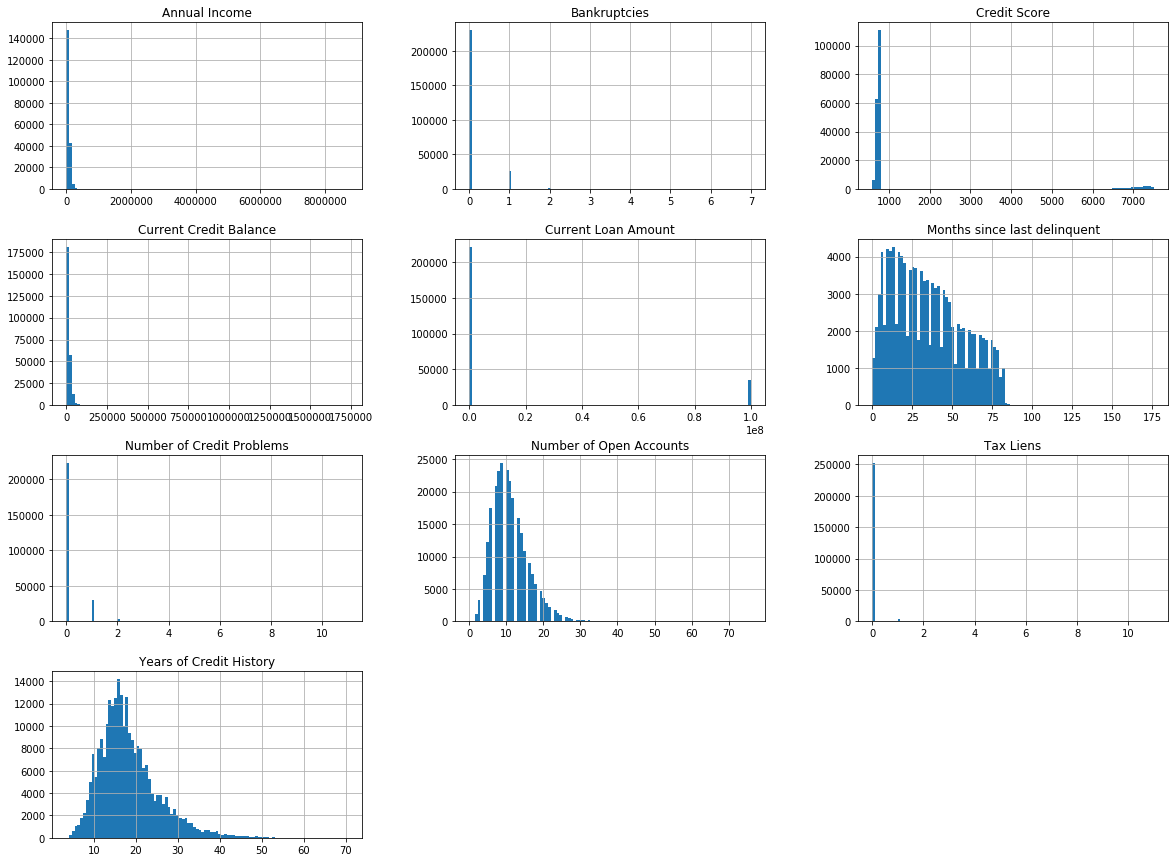

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=100, figsize=(20,15))
plt.show()

In [9]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [10]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [11]:
df['Fully_Paid'] = pd.get_dummies(df['Loan Status'],drop_first=True)
df = df.drop('Loan Status',axis=1)

In [12]:
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully_Paid
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,1
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0,1
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0,1
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0,1
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0,1


In [13]:
abs(df.corr()['Fully_Paid']).sort_values(ascending=False)

Fully_Paid                      1.000000
Credit Score                    0.440307
Current Loan Amount             0.269804
Annual Income                   0.070328
Years of Credit History         0.035548
Months since last delinquent    0.023541
Number of Open Accounts         0.020787
Tax Liens                       0.012585
Number of Credit Problems       0.010179
Current Credit Balance          0.008838
Bankruptcies                    0.001154
Name: Fully_Paid, dtype: float64

In [14]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
Fully_Paid                           0
dtype: int64

In [15]:
61676/256984

0.23999937739314509

In [16]:
a = df['Credit Score'].values.tolist()

In [17]:
def FixHighCreditScore():
    a = df['Credit Score'].values.tolist()
    b=[]
    for i in range(len(a)):
        if math.isnan(a[i]) == True:
            b.append(a[i])
        elif a[i] > 850:
            b.append(a[i]/1000)
        else:
            b.append(a[i])
    if len(a) == len(b):
        print("passed")
    
    return b

In [18]:
df['Parsed_CreditScore'] = pd.DataFrame(FixHighCreditScore())

passed


In [19]:
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully_Paid,Parsed_CreditScore
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,1,741.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0,1,734.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0,1,747.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0,1,747.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0,1,746.0


In [20]:
df = df.drop('Credit Score',axis=1)

In [21]:
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully_Paid,Parsed_CreditScore
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,11520,Short Term,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,1,741.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,3441,Short Term,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0,1,734.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,21029,Short Term,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0,1,747.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,18743,Short Term,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0,1,747.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,11731,Short Term,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0,1,746.0


In [22]:
df['Parsed_CreditScore'] = df['Parsed_CreditScore'].fillna(df['Parsed_CreditScore'].median())

In [23]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Current Loan Amount                  0
Term                                 0
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
Fully_Paid                           0
Parsed_CreditScore                   0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum Open Credit             256984 non-null object
Bankruptcies                    256455 non-null float64
Tax Liens

In [25]:
df['Years in current job'].head(100)

0     10+ years
1       4 years
2     10+ years
3     10+ years
4       4 years
        ...    
95          NaN
96       1 year
97       1 year
98      3 years
99      9 years
Name: Years in current job, Length: 100, dtype: object

In [26]:
def ParseYearsInCurrentJobData():
    a = df['Years in current job'].values.tolist()
    b = []
    for i in range(len(a)):
        if type(a[i]) == str:    
            if(len(df['Years in current job'][i].split()) == 3):
                b.append(0)
            elif(len(df['Years in current job'][i].split()) == 2):
                if(df['Years in current job'][i].split()[0] == '10+'):
                    b.append(10)
                else:
                    b.append(int(df['Years in current job'][i].split()[0]))           
            else:
                b.append(a[i])
                print(a[i])
        else:
            b.append(a[i])
            
    if len(a) == len(b):
        print("passed")
        
    return b

In [27]:
df['Parsed_YearsInCurrentJob'] = pd.DataFrame(ParseYearsInCurrentJobData())

passed


In [28]:
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully_Paid,Parsed_CreditScore,Parsed_YearsInCurrentJob
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,11520,Short Term,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,1,741.0,10.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,3441,Short Term,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0,1,734.0,4.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,21029,Short Term,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0,1,747.0,10.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,18743,Short Term,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0,1,747.0,10.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,11731,Short Term,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0,1,746.0,4.0


In [29]:
df = df.drop("Years in current job",axis=1)

In [30]:
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully_Paid,Parsed_CreditScore,Parsed_YearsInCurrentJob
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,11520,Short Term,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,1,741.0,10.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,3441,Short Term,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0,1,734.0,4.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,21029,Short Term,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0,1,747.0,10.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,18743,Short Term,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0,1,747.0,10.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,11731,Short Term,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0,1,746.0,4.0


In [31]:
df['Parsed_YearsInCurrentJob'] = df['Parsed_YearsInCurrentJob'].fillna(df['Parsed_YearsInCurrentJob'].median())

In [32]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Current Loan Amount                  0
Term                                 0
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
Fully_Paid                           0
Parsed_CreditScore                   0
Parsed_YearsInCurrentJob             0
dtype: int64

In [33]:
df = df.drop('Months since last delinquent', axis=1)

In [34]:
df.isnull().sum()

Loan ID                          0
Customer ID                      0
Current Loan Amount              0
Term                             0
Home Ownership                   0
Annual Income                61676
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                   529
Tax Liens                       23
Fully_Paid                       0
Parsed_CreditScore               0
Parsed_YearsInCurrentJob         0
dtype: int64

In [35]:
outliers = df.quantile(.97)

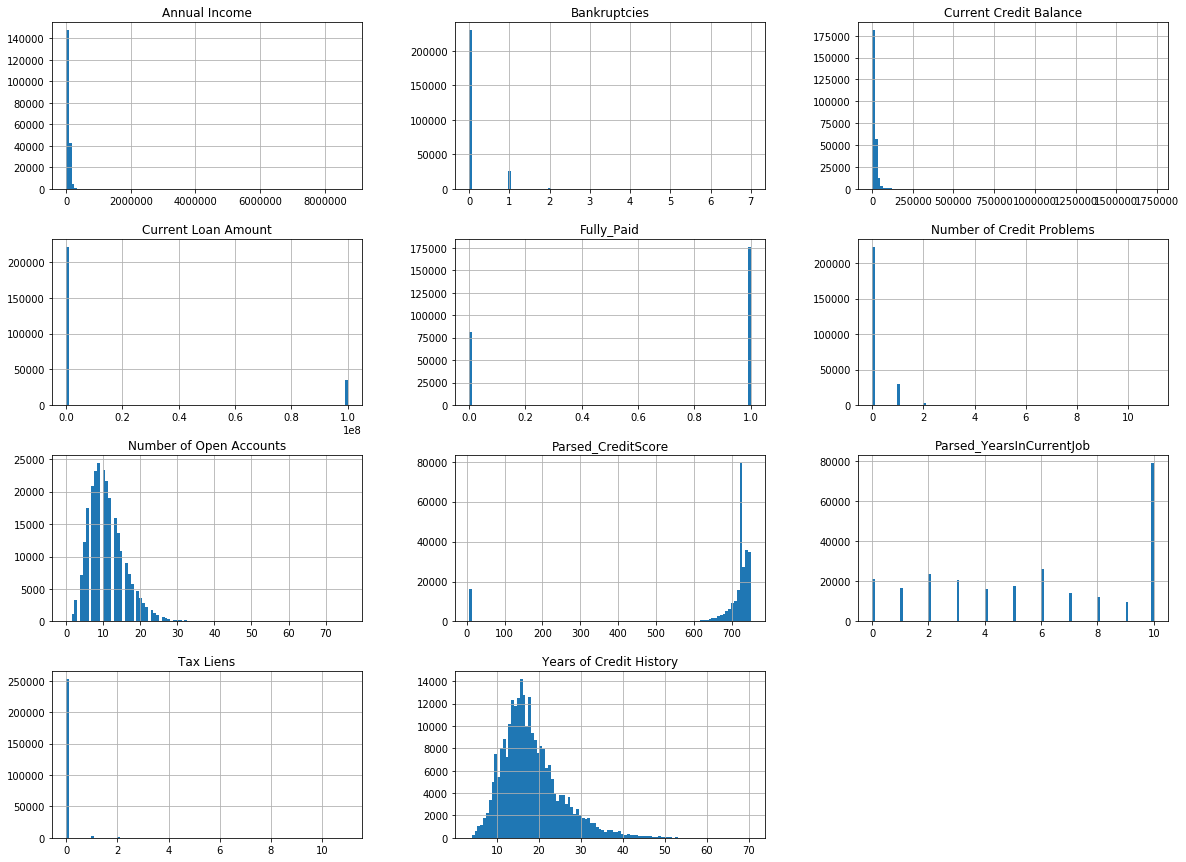

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=100, figsize=(20,15))
plt.show()

In [37]:
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].median())
df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].median())

In [38]:
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Current Loan Amount          0
Term                         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
Fully_Paid                   0
Parsed_CreditScore           0
Parsed_YearsInCurrentJob     0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 18 columns):
Loan ID                      256984 non-null object
Customer ID                  256984 non-null object
Current Loan Amount          256984 non-null int64
Term                         256984 non-null object
Home Ownership               256984 non-null object
Annual Income                256984 non-null float64
Purpose                      256984 non-null object
Monthly Debt                 256984 non-null object
Years of Credit History      256984 non-null float64
Number of Open Accounts      256984 non-null int64
Number of Credit Problems    256984 non-null int64
Current Credit Balance       256984 non-null int64
Maximum Open Credit          256984 non-null object
Bankruptcies                 256984 non-null float64
Tax Liens                    256984 non-null float64
Fully_Paid                   256984 non-null uint8
Parsed_CreditScore           256984 non-null float64
Parse

In [40]:
df = df.drop(['Customer ID','Loan ID','Purpose'],axis=1)

In [41]:
df['Parsed_MonthlyDebt'] = pd.DataFrame([float(df['Monthly Debt'][i].replace(',','').replace('$','').replace(' ','')) for i in range(len(df['Monthly Debt']))])

In [42]:
df = df.drop(['Monthly Debt'], axis=1)

In [43]:
df.head()

,Current Loan Amount,Term,Home Ownership,Annual Income,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully_Paid,Parsed_CreditScore,Parsed_YearsInCurrentJob,Parsed_MonthlyDebt
0,11520,Short Term,Home Mortgage,33694.0,12.3,10,0,6760,16056,0.0,0.0,1,741.0,10.0,584.03
1,3441,Short Term,Home Mortgage,42269.0,26.3,17,0,6262,19149,0.0,0.0,1,734.0,4.0,1106.04
2,21029,Short Term,Home Mortgage,90126.0,28.8,5,0,20967,28335,0.0,0.0,1,747.0,10.0,1321.85
3,18743,Short Term,Own Home,38072.0,26.2,9,0,22529,43915,0.0,0.0,1,747.0,10.0,751.92
4,11731,Short Term,Rent,50025.0,11.5,12,0,17391,37081,0.0,0.0,1,746.0,4.0,355.18


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 15 columns):
Current Loan Amount          256984 non-null int64
Term                         256984 non-null object
Home Ownership               256984 non-null object
Annual Income                256984 non-null float64
Years of Credit History      256984 non-null float64
Number of Open Accounts      256984 non-null int64
Number of Credit Problems    256984 non-null int64
Current Credit Balance       256984 non-null int64
Maximum Open Credit          256984 non-null object
Bankruptcies                 256984 non-null float64
Tax Liens                    256984 non-null float64
Fully_Paid                   256984 non-null uint8
Parsed_CreditScore           256984 non-null float64
Parsed_YearsInCurrentJob     256984 non-null float64
Parsed_MonthlyDebt           256984 non-null float64
dtypes: float64(7), int64(4), object(3), uint8(1)
memory usage: 27.7+ MB


In [45]:
df.isnull().sum()

Current Loan Amount          0
Term                         0
Home Ownership               0
Annual Income                0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
Fully_Paid                   0
Parsed_CreditScore           0
Parsed_YearsInCurrentJob     0
Parsed_MonthlyDebt           0
dtype: int64

In [46]:
def ParseMaxOpenCredit():
    a = df['Maximum Open Credit'].values.tolist()
    b = []
    for i in range(len(a)):
        if type(a[i]) == str:  
            if('#' not in a[i]):
                b.append(float(a[i]))
            else:
                b.append(float('NaN'))
        else:
            b.append(a[i])
            
    if len(a) == len(b):
        print("passed")
        
    return b

In [47]:
df['Parsed_MaxOpenCredit'] = pd.DataFrame(ParseMaxOpenCredit())

passed


In [48]:
df.isnull().sum()

Current Loan Amount          0
Term                         0
Home Ownership               0
Annual Income                0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
Fully_Paid                   0
Parsed_CreditScore           0
Parsed_YearsInCurrentJob     0
Parsed_MonthlyDebt           0
Parsed_MaxOpenCredit         4
dtype: int64

In [49]:
#df['Parsed_MaxOpenCredit'] = df['Parsed_MaxOpenCredit'].fillna(df['Parsed_MaxOpenCredit'].median())
df['Parsed_MaxOpenCredit'] = df['Parsed_MaxOpenCredit'].fillna(df['Parsed_MaxOpenCredit'].mean())

In [50]:
df = df.drop(['Maximum Open Credit'], axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 15 columns):
Current Loan Amount          256984 non-null int64
Term                         256984 non-null object
Home Ownership               256984 non-null object
Annual Income                256984 non-null float64
Years of Credit History      256984 non-null float64
Number of Open Accounts      256984 non-null int64
Number of Credit Problems    256984 non-null int64
Current Credit Balance       256984 non-null int64
Bankruptcies                 256984 non-null float64
Tax Liens                    256984 non-null float64
Fully_Paid                   256984 non-null uint8
Parsed_CreditScore           256984 non-null float64
Parsed_YearsInCurrentJob     256984 non-null float64
Parsed_MonthlyDebt           256984 non-null float64
Parsed_MaxOpenCredit         256984 non-null float64
dtypes: float64(8), int64(4), object(2), uint8(1)
memory usage: 27.7+ MB


In [52]:
df = pd.get_dummies(df, drop_first = True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 17 columns):
Current Loan Amount             256984 non-null int64
Annual Income                   256984 non-null float64
Years of Credit History         256984 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Bankruptcies                    256984 non-null float64
Tax Liens                       256984 non-null float64
Fully_Paid                      256984 non-null uint8
Parsed_CreditScore              256984 non-null float64
Parsed_YearsInCurrentJob        256984 non-null float64
Parsed_MonthlyDebt              256984 non-null float64
Parsed_MaxOpenCredit            256984 non-null float64
Term_Short Term                 256984 non-null uint8
Home Ownership_Home Mortgage    256984 non-null uint8
Home Ownership_Own Home         256984 non-null uint8
Home Owne

In [54]:
df.isnull().sum()

Current Loan Amount             0
Annual Income                   0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Bankruptcies                    0
Tax Liens                       0
Fully_Paid                      0
Parsed_CreditScore              0
Parsed_YearsInCurrentJob        0
Parsed_MonthlyDebt              0
Parsed_MaxOpenCredit            0
Term_Short Term                 0
Home Ownership_Home Mortgage    0
Home Ownership_Own Home         0
Home Ownership_Rent             0
dtype: int64

In [55]:
df.head()

,Current Loan Amount,Annual Income,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Fully_Paid,Parsed_CreditScore,Parsed_YearsInCurrentJob,Parsed_MonthlyDebt,Parsed_MaxOpenCredit,Term_Short Term,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,11520,33694.0,12.3,10,0,6760,0.0,0.0,1,741.0,10.0,584.03,16056.0,1,1,0,0
1,3441,42269.0,26.3,17,0,6262,0.0,0.0,1,734.0,4.0,1106.04,19149.0,1,1,0,0
2,21029,90126.0,28.8,5,0,20967,0.0,0.0,1,747.0,10.0,1321.85,28335.0,1,1,0,0
3,18743,38072.0,26.2,9,0,22529,0.0,0.0,1,747.0,10.0,751.92,43915.0,1,0,1,0
4,11731,50025.0,11.5,12,0,17391,0.0,0.0,1,746.0,4.0,355.18,37081.0,1,0,0,1


In [56]:
df = df.drop_duplicates()

In [57]:
abs(df.corr()['Fully_Paid']).sort_values(ascending=False)

Fully_Paid                      1.000000
Parsed_CreditScore              0.438916
Current Loan Amount             0.250020
Term_Short Term                 0.176475
Home Ownership_Home Mortgage    0.063548
Annual Income                   0.062979
Home Ownership_Rent             0.060157
Years of Credit History         0.035197
Number of Open Accounts         0.020394
Parsed_MonthlyDebt              0.015191
Tax Liens                       0.012524
Number of Credit Problems       0.009109
Current Credit Balance          0.008981
Home Ownership_Own Home         0.008056
Parsed_MaxOpenCredit            0.007077
Parsed_YearsInCurrentJob        0.004654
Bankruptcies                    0.001906
Name: Fully_Paid, dtype: float64

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [59]:
def algo_test(dataset, y_name):
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    log = LogisticRegression()
    gbc = GradientBoostingClassifier()
    d = DecisionTreeClassifier()
    r = RandomForestClassifier()
    
    x = dataset.drop(y_name,axis = 1) 
    y = dataset[y_name]
    
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=13)
    
    algos = [g,b,k,log,d,r,gbc]
    algo_names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Logistic','Single Tree','Random Forest','Gradient Boost']
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    result = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = algo_names)
    
    #result.index.name = 'Algorithms'
    
    for algo in algos:
        algo.fit(x_train,y_train)
        algo.predict(x_test)
        
        accuracy.append(accuracy_score(y_test, algo.predict(x_test)))
        precision.append(precision_score(y_test, algo.predict(x_test)))
        recall.append(recall_score(y_test, algo.predict(x_test)))
        f1.append(f1_score(y_test, algo.predict(x_test)))
    
    result.Accuracy = accuracy
    result.Precision = precision
    result.Recall = recall
    result.F1 = f1
    
    return result.sort_values('F1', ascending=False)

In [60]:
algo_test(df,'Fully_Paid')

,Accuracy,Precision,Recall,F1
Gradient Boost,0.800441,0.795076,0.982978,0.879099
Random Forest,0.778725,0.824547,0.889471,0.855779
Logistic,0.738081,0.738081,1.000000,0.849306
BernoulliNB,0.738123,0.738410,0.999155,0.849218
K Nearest,0.713911,0.774549,0.863826,0.816755
Single Tree,0.728721,0.822684,0.806223,0.814370
GaussianNB,0.408229,0.999432,0.198343,0.330998
